## Notebook to run the analysis in the Discussion section of the paper, Fig. 16

In [1]:
from astropy.table import Table
from scipy import interpolate
from astropy.units import Unit
from astropy import constants as const
import itertools

In [2]:
def RO_obs_t_obs_decay(t_obs_days,m_B,beta,nu_0,nu_obs,phi):
    return t_obs_days*86400*2*beta*m_B*const.c.cgs.value/((nu_0/nu_obs)**phi)

In [3]:
def RO_obs_t_obs_rise(t_obs_days,beta,nu_0,nu_obs,phi):
    return t_obs_days*86400*3*beta*const.c.cgs.value/((nu_0/nu_obs)**phi-1)

In [4]:
def RO_obs_delta_t(t_obs_days,beta,nu_0,nu_obs,phi,t_exp=0):
    return (t_exp*84000)+(t_obs_days*86400*3*beta*const.c.cgs.value/((nu_0/nu_obs)**phi-1))

In [5]:
t_range_days=np.logspace(0,3.5,1000)

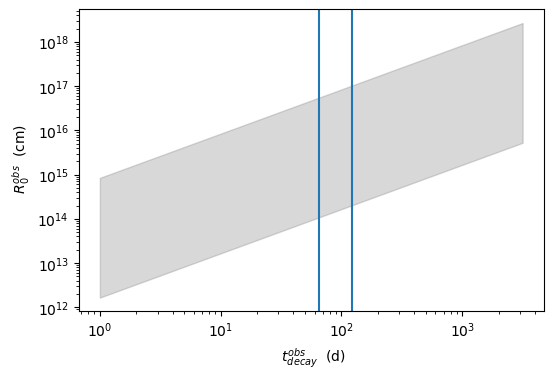

In [6]:
fig=plt.figure(dpi=100)
ax=fig.add_subplot()

N=5
m_B=np.linspace(1,2,N)
beta=np.logspace(-3,-1,N)
nu_0=np.linspace(2.5E10,1E11,N)
phi= np.linspace(0.4,0.6,N)
combinations = itertools.product(m_B,beta,nu_0,phi)

y = np.zeros((N**4,t_range_days.size))

for ID, c in enumerate(combinations):
    y[ID]=RO_obs_t_obs_decay(t_range_days,m_B=c[0],beta=c[1],nu_0=c[2],nu_obs=1.5E10,phi=c[3])
    #ax.plot(t_range_days,y[ID],'-',label='beta=%3.3e'%c[1])

y_min=np.amin(y, axis=0)
y_max=np.amax(y, axis=0)
ax.fill_between(t_range_days,y_max ,y_min ,color='gray',alpha=0.3,label='')


ax.set_xlabel(' $t_{decay}^{obs}$  (d)')
ax.set_ylabel(' $R_{0}^{obs}$  (cm)')

ax.axvline(65)
ax.axvline(122)
ax.set_yscale('log')
ax.set_xscale('log')


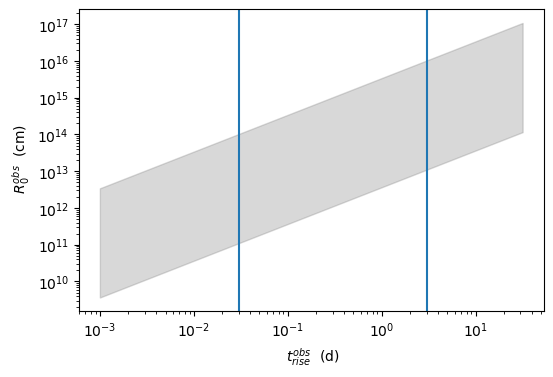

In [7]:
t_range_days=np.logspace(-3,1.5,1000)
fig=plt.figure(dpi=100)
ax=fig.add_subplot()

N=5
beta=np.logspace(-3,-1,N)
nu_0=np.linspace(2.5E10,1E11,N)
phi= np.linspace(0.4,0.6,N)
combinations = itertools.product(beta,nu_0,phi)

y = np.zeros((N**3,t_range_days.size))

for ID, c in enumerate(combinations):
    y[ID]=RO_obs_t_obs_rise(t_range_days,beta=c[0],nu_0=c[1],nu_obs=1.5E10,phi=c[2])
    #ax.plot(t_range_days,y[ID],'-',label='beta=%3.3e'%c[1])

y_min=np.amin(y, axis=0)
y_max=np.amax(y, axis=0)
ax.fill_between(t_range_days,y_max ,y_min ,color='gray',alpha=0.3,label='')


ax.set_xlabel(' $t_{rise}^{obs}$  (d)')
ax.set_ylabel(' $R_{0}^{obs}$  (cm)')

ax.axvline(0.03)
ax.axvline(3)
ax.set_yscale('log')
ax.set_xscale('log')


In [29]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.pyplot import gca


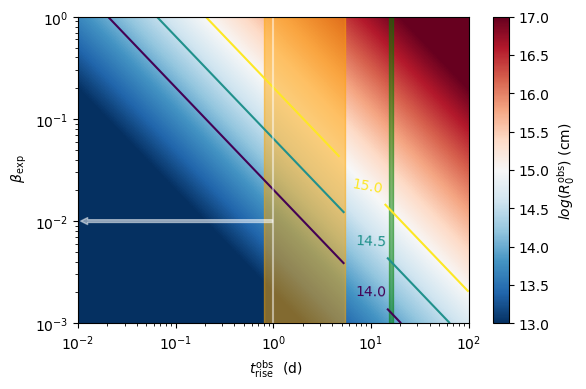

In [53]:

N=1000
m_B=1
beta=np.logspace(-3,0,N)
nu_0=1E11
phi= 0.5
t_range_days=np.logspace(-2,2,N)
X, Y = np.meshgrid(t_range_days, beta)
Z=RO_obs_t_obs_rise(X,Y,nu_0=nu_0,nu_obs=1.5E10,phi=phi)
fig, ax = plt.subplots(dpi=100)
#CS = ax.pcolormesh(X, Y, Z,levels=np.logspace(-1,3,10),alpha=0.8,cmap=cm.viridis)
CS = ax.contour(X, Y, np.log10(Z),levels=np.arange(14,15.5,.5))
ax.clabel(CS, inline=True, fontsize=10,fmt='%1.1f',manual=((10,0.1),(10,0.01),(10,0.01)),use_clabeltext=False)
CS1=ax.pcolormesh(X, Y, np.log10(Z),
                       norm=colors.Normalize(vmin=13, vmax=17),
                       cmap='RdBu_r', shading='auto')
cbar = fig.colorbar(CS1,format='%2.1f')
cbar.ax.set_ylabel(r'$log(R_0^{\rm obs})$ (cm)')
#ax.axvline(0.03,c='white',ls='--')
#ax.axvline(3,c='yellow',ls='--')
ax.axvline(1, alpha=0.5, color='white')
opt = dict(color='white', 
            arrowstyle = 'simple,head_width=.5,head_length=.5',
            connectionstyle = 'arc3,rad=-0',alpha=0.5)
a2  = gca().annotate('',xy=(1E-2,1e-2), xycoords='data',xytext =(1.05,1e-2),textcoords = 'data',arrowprops=opt,size=10)

ax.axvspan(3.3-2.5,3.3+2.17, alpha=0.5, color='orange')
ax.axvspan(16.1-0.7,16.1+0.6, alpha=0.5, color='green')
ax.set_xlabel(r' $t_{\rm rise}^{\rm obs}$  (d)')
ax.set_ylabel(r' $\beta_{\rm exp}$')
#ax.set_xlim(-0.2)
ax.set_yscale('log')
ax.set_xscale('log')
plt.tight_layout()

In [55]:
fig.savefig('Estimate_par_from_obs/t_rise_data_comp.png',bbox_inches = 'tight',
    pad_inches = 0)


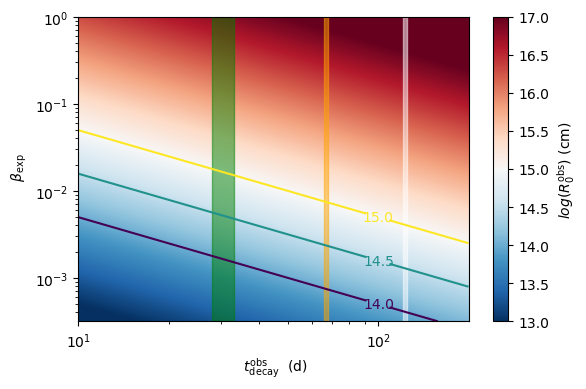

In [88]:
N=1000
m_B=1
beta=np.logspace(-3.5,0,N)
nu_0=1E11
phi= 0.5
t_range_days=np.logspace(1,2.3,N)
X, Y = np.meshgrid(t_range_days, beta)
Z=RO_obs_t_obs_decay(X,m_B=m_B,beta=Y,nu_0=nu_0,nu_obs=1.5E10,phi=phi)
fig, ax = plt.subplots(dpi=100)
#CS = ax.pcolormesh(X, Y, Z,levels=np.logspace(-1,3,10),alpha=0.8,cmap=cm.viridis)
CS = ax.contour(X, Y, np.log10(Z),levels=np.arange(14,15.5,.5))
ax.clabel(CS, inline=True, fontsize=10,fmt='%1.1f',manual=((100,0.1),(100,0.01),(100,0.01)))
CS1=ax.pcolormesh(X, Y, np.log10(Z),
                       norm=colors.Normalize(vmin=13, vmax=17),
                       cmap='RdBu_r', shading='auto')
cbar = fig.colorbar(CS1,format='%2.1f')
cbar.ax.set_ylabel(r'$log(R_0^{\rm obs})$ (cm)')
#ax.axvline(65,c='white',ls='--')
#ax.axvline(122,c='yellow',ls='--')
ax.axvspan(122.5-2.11, 122.5+2.11, alpha=0.5, color='white')
ax.axvspan(66.5-0.49,66.5+1.5, alpha=0.5, color='orange')
ax.axvspan(30.1-2.1,30.1+2.9, alpha=0.5, color='green')
ax.set_xlabel(r' $t_{\rm decay}^{\rm obs}$  (d)')
ax.set_ylabel(r' $\beta_{\rm exp}$')
#ax.set_xlim(0.1)
ax.set_yscale('log')
ax.set_xscale('log')
plt.tight_layout()

In [89]:
fig.savefig('Estimate_par_from_obs/t_dec_data_comp.png',bbox_inches = 'tight',
    pad_inches = 0)

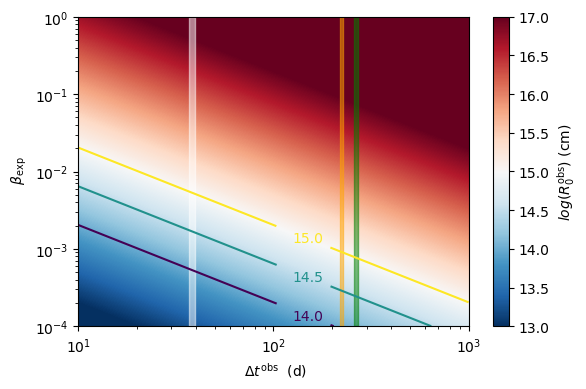

In [90]:
N=1000
m_B=1
beta=np.logspace(-4,0,N)
nu_0=1E11
phi= 0.5
t_range_days=np.logspace(1,3,N)
X, Y = np.meshgrid(t_range_days, beta)
Z=RO_obs_delta_t(X,Y,nu_0=nu_0,nu_obs=1.5E10,phi=phi)
fig, ax = plt.subplots(dpi=100)
#CS = ax.pcolormesh(X, Y, Z,levels=np.logspace(-1,3,10),alpha=0.8,cmap=cm.viridis)
CS = ax.contour(X, Y, np.log10(Z),levels=np.arange(14,15.5,.5))
ax.clabel(CS, inline=True, fontsize=10,fmt='%1.1f',manual=((150,0.1),(150,0.01),(150,0.001)),use_clabeltext=True)
CS1=ax.pcolormesh(X, Y, np.log10(Z),
                       norm=colors.Normalize(vmin=13, vmax=17),
                       cmap='RdBu_r', shading='auto')
cbar = fig.colorbar(CS1,format='%2.1f')
cbar.ax.set_ylabel(r'$log(R_0^{\rm obs})$ (cm)')
#ax.axvline(38,c='white',ls='--')
#ax.axvline(224,c='yellow',ls='--')
ax.axvspan(38.4-1.3, 38.4+1.3, alpha=0.5, color='white')
ax.axvspan(224.2-3.9,224.2+3.1, alpha=0.5, color='orange')
ax.axvspan(264.3-6.5,264.3+6.2, alpha=0.5, color='green')
ax.set_xlabel(r' $\Delta t^{\rm obs}$  (d)')
ax.set_ylabel(r' $\beta_{\rm exp}$')
#ax.set_xlim(-0.2)
ax.set_yscale('log')
ax.set_xscale('log')
plt.tight_layout()

In [91]:
fig.savefig('Estimate_par_from_obs/delta_t_data_comp.png',bbox_inches = 'tight',
    pad_inches = 0)